In [180]:
import pandas as pd
import os

In [181]:
df=pd.read_csv('data.csv')
df.head()

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WPATH,WPOL,XLogP,Zagreb,pIC50,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,3011,47,4.666,166,8.602,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,3516,54,5.804,174,8.125,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,3542,52,2.964,176,8.509,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,3594,50,6.015,174,8.409,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,3594,50,4.462,174,8.131,0,1,1,0,0


In [182]:
df=df.drop_duplicates()
df=df.dropna()
df
##去除空白值和重复值

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WPATH,WPOL,XLogP,Zagreb,pIC50,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,3011,47,4.666,166,8.602,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,3516,54,5.804,174,8.125,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,3542,52,2.964,176,8.509,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,3594,50,6.015,174,8.409,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,3594,50,4.462,174,8.131,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,7121,70,2.526,236,6.132,0,1,1,0,1
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,6171,66,1.884,228,5.851,0,1,1,0,1
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,6421,66,1.884,228,7.721,0,1,0,0,1
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,2583,50,0.782,174,7.886,0,1,0,0,1


In [183]:

df_zscore = df.copy()  # 复制一个用来存储Z-score得分的数据框
cols = df.columns  #  获得列表框的列名
for col in cols:
    df_col = df[col]  #  得到每一列的值
    if(col!='SMILES'):
        z_score =(df_col - df_col.mean()) / df_col.std() #  计算每一列的Z-score得分
        df_zscore[col] = z_score.abs() > 2.2  # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
    else:
        df_zscore[col]=False
for col in cols:
    df_drop_outlier = df[df_zscore[col] == False]
##处理异常值
df=df_drop_outlier
df

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WPATH,WPOL,XLogP,Zagreb,pIC50,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,3011,47,4.666,166,8.602,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,3516,54,5.804,174,8.125,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,3542,52,2.964,176,8.509,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,3594,50,6.015,174,8.409,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,3594,50,4.462,174,8.131,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,7121,70,2.526,236,6.132,0,1,1,0,1
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,6171,66,1.884,228,5.851,0,1,1,0,1
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,6421,66,1.884,228,7.721,0,1,0,0,1
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,2583,50,0.782,174,7.886,0,1,0,0,1


In [184]:
df_Spearman=df.corr(method='spearman')['pIC50'].abs().sort_values(ascending=False)
df_Spearman[:20]
df_Spearman[1:20]

C:\Users\PC-XR\AppData\Local\Temp\ipykernel_17232\3333549951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Spearman=df.corr(method='spearman')['pIC50'].abs().sort_values(ascending=False)


MDEC-23              0.549059
MLogP                0.545199
LipoaffinityIndex    0.524914
C1SP2                0.502404
nC                   0.486774
CrippenLogP          0.473761
maxsOH               0.461918
AMR                  0.454518
ATSp5                0.451414
SwHBa                0.445723
ATSp4                0.444363
ATSp2                0.444306
ATSp1                0.443922
C2SP2                0.442919
SP-5                 0.442668
apol                 0.440493
minsssN              0.438910
nT6Ring              0.438325
fragC                0.437020
Name: pIC50, dtype: float64

In [185]:
df_x=list(df_Spearman[1:20].keys())
df_x

['MDEC-23',
 'MLogP',
 'LipoaffinityIndex',
 'C1SP2',
 'nC',
 'CrippenLogP',
 'maxsOH',
 'AMR',
 'ATSp5',
 'SwHBa',
 'ATSp4',
 'ATSp2',
 'ATSp1',
 'C2SP2',
 'SP-5',
 'apol',
 'minsssN',
 'nT6Ring',
 'fragC']

In [186]:
cols = df.columns  #  获得列表框的列名
X = df.copy()
for col in cols:
    if(col not in df_x):
        X = X.drop([col],axis=1) # 特征
y = df.loc[:, ['pIC50']] # 目标
X

,AMR,apol,nC,ATSp1,ATSp2,ATSp4,ATSp5,C1SP2,C2SP2,SP-5,CrippenLogP,SwHBa,minsssN,maxsOH,LipoaffinityIndex,fragC,MLogP,MDEC-23,nT6Ring
0,126.1188,74.170169,26,2469.977567,2930.668527,4128.339568,3792.779760,0,11,8.014902,5.50408,19.410374,2.516142,9.968948,11.830949,3694.05,3.77,28.277932,4
1,131.9420,80.357341,28,2679.488262,3157.289284,4811.560374,4154.384741,0,11,8.752274,6.28428,19.530549,2.521244,10.058948,13.149974,4420.05,3.99,31.076748,4
2,139.9304,74.064997,27,2576.569862,3054.050592,4479.177597,3993.734054,0,16,8.856915,6.11878,27.146320,2.484448,9.977508,10.577177,3300.06,3.77,30.901064,5
3,133.4822,80.357341,28,2596.316352,3045.933534,4311.294610,3850.190106,0,11,8.626244,6.28428,19.452294,2.519774,10.025028,13.212767,4420.05,3.99,30.570001,5
4,143.1903,76.356583,28,2561.845107,3007.231045,4265.064807,3806.120673,0,16,8.626244,5.55658,30.949906,2.504217,9.993342,12.489691,3568.05,3.99,30.570001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,177.6817,89.159790,34,3435.707126,4159.009056,6121.378119,6237.629855,0,22,11.871957,6.07537,36.466250,0.000000,9.862971,10.292932,4278.09,4.21,45.421854,5
1970,167.6057,82.972618,32,3297.276571,4002.868699,5840.130133,5948.533703,0,22,11.110918,5.46937,32.410085,0.000000,9.829120,7.884092,3544.09,3.99,45.421854,5
1971,167.6057,82.972618,32,3275.017812,3971.981132,5772.028702,5804.010590,0,22,11.166916,5.46937,32.695525,0.000000,9.815320,7.965074,3544.09,3.99,44.466435,5
1972,125.5605,63.287860,24,2554.725206,3132.708913,4603.096973,4727.556804,0,16,8.875549,4.17938,26.034284,0.000000,9.706524,6.236558,2095.07,3.33,32.179316,4


In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [188]:
y_pIC50_train = y_train.loc[:,"pIC50"]
y_pIC50_test = y_test.loc[:,"pIC50"]

In [199]:
#使用随机森林的方法构建模型
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 250,min_samples_leaf = 3,max_depth=40)
rf_model.fit(X_train,y_pIC50_train) # 预测IC50_nM的模型训练

RandomForestRegressor(max_depth=40, min_samples_leaf=3, n_estimators=250)

In [200]:
score = rf_model.score(X_test, y_test)
score#拟合优度

0.7288201636660261

In [201]:

# 提取一个决策树
estimator = rf_model.estimators_[0]

from sklearn.tree import export_graphviz
# 导出为dot 文件
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_x,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

##dot -Tpng tree.dot -o tree.png


In [163]:
cols = df.columns  #  获得列表框的列名
X = df.copy()
for col in cols:
    if(col not in df_x):
        X = X.drop([col],axis=1) # 特征
y = df.loc[:, ['pIC50']] # 目标
X = X.drop(['AMR','ATSp4','ATSp5','MLogP','nC','SwHBa'],axis=1) 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_pIC50_train = y_train.loc[:,"pIC50"]
y_pIC50_test = y_test.loc[:,"pIC50"]

In [164]:


import statsmodels.api as sm
mod=sm.OLS(y_train,sm.add_constant(X_train))
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pIC50   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.80e-233
Time:                        19:07:46   Log-Likelihood:                -2224.3
No. Observations:                1579   AIC:                             4477.
Df Residuals:                    1565   BIC:                             4552.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9601      0.163     30.363      0.000       4.640       5.281
apol                 -0.1064      0.012     -8.664      0.000      -0.130      -0.082
ATSp1                 0.0138      0.002      8.539      0.000       0.011       0.017
ATSp2                -0.0099      0.001     -8.020      0.000      -0.012      -0.007
C1SP2                -0.3422      0.031    -11.187      0.000      -0.402      -0.282
C2SP2                -0.0475      0.013     -3.789      0.000      -0.072      -0.023
SP-5                  0.3549      0.073      4.870      0.000       0.212       0.498
CrippenLogP          -0.0910      0.034     -2.714      0.007      -0.157      -0.025
minsssN               0.1668      0.033      5.090      0.000       0.103       0.231
maxsOH                0.1117      0.008     14.458      0.000       0.097       0.127
LipoaffinityIndex     0.1449      0.020      7.189      0.000       0.105       0.184
fragC              7.223e-05   2.59e-05      2.784      0.005    2.13e-05       0.000
MDEC-23               0.0527      0.007      7.897      0.000       0.040       0.066
nT6Ring              -0.3496      0.045     -7.718      0.000      -0.438      -0.261
==============================================================================
Omnibus:                        7.534   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.457
Skew:                          -0.044   Prob(JB):                      0.00884
Kurtosis:                       3.369   Cond. No.                     3.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
cols = df.columns  #  获得列表框的列名
X = df.copy()
for col in cols:
    if(col not in df_x):
        X = X.drop([col],axis=1)
y = df.loc[:, ['Caco-2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666) 


In [203]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

In [204]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train_std, y_train)
y_predicted = clf.predict(X_test_std)

C:\Users\PC-XR\AppData\Local\Temp\ipykernel_17232\1251240948.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train_std, y_train)


In [205]:
score = clf.score(X_test_std, y_test) 
score

0.810126582278481

In [206]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

as_s=accuracy_score(y_test, y_predicted)
f1_s=f1_score(y_test,y_predicted)
print(as_s)
print(f1_s)

0.810126582278481
0.7747747747747747


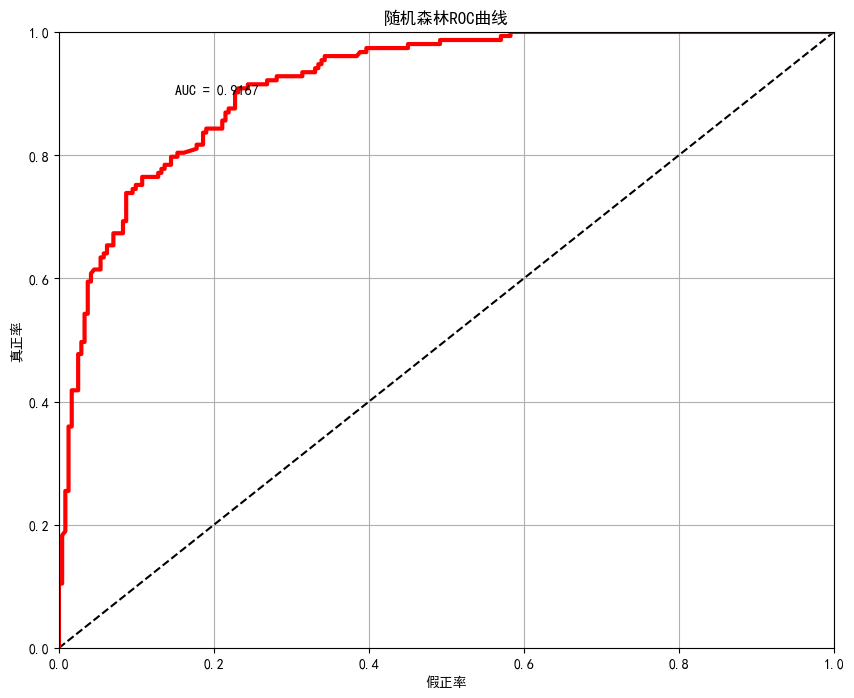

In [207]:
import matplotlib.pyplot as plt
from sklearn.metrics import *

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
pre_y = clf.predict_proba(X_test_std)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_test, pre_y)
aucval = auc(fpr_Nb, tpr_Nb)    # 计算auc的取值
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("假正率")
plt.ylabel("真正率")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("随机森林ROC曲线")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()